In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import ants

from nilearn import plotting
from deepbrain import Extractor
from nipype import Node, Workflow
from nipype.interfaces.fsl import BET, IsotropicSmooth

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# High-Grade Gliomas (HGG)
- Gliomas are tumors.
- HGG are tumors that grow at a high rate.

In [2]:
# HGG Train
# Creating folder path for each folder in directory
folder_contents_path = [('data/MICCAI_BraTS_2019_Data_Training/HGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/HGG') if 'BraTS19' in file_name]

In [14]:
# Getting all image data from HGG Training
hgg_img_data_train = []

for folder_path in folder_contents_path:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:
            
            # N4 Bias Field Correction
            img_raw = ants.image_read(file_path)
            n4_file_path = 'data/n4_processed/' + str(file[:-7]) + '_n4' + str(file[-7:])
            ants.n4_bias_field_correction(img_raw).to_file(n4_file_path)
            
#             # Skull Stripping using BET
#             bet_file_path = 'data/bet_processed/' +
#             BET(in_file = n4_file_path,
#                 out_file = '/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask.nii.gz').run()

#             img = nib.load(file_path)
#             array_flat = img.get_data().ravel()
#             hgg_img_data_train.append(array_flat)
# #             hgg_img_data_train.append(img.get_data().ravel())

In [20]:
n4_path = 'data/n4_processed/'
os.listdir(n4_path)

error_list = []

for file in os.listdir(n4_path):
    if file.endswith('t1_n4.nii.gz') or file.endswith('t2_n4.nii.gz') or file.endswith('flair_n4.nii.gz') or file.endswith('t1ce_n4.nii.gz'):
        bet_file_path = 'data/bet_processed/' + str(file[:-7]) + '_bet' + str(file[-7:])
        in_file_path = n4_path + file
        
        try:
            BET(in_file=in_file_path,
               out_file = bet_file_path).run()
            
        except:
            error_list.append(in_file_path)
            pass

191121-09:10:48,562 nipype.interface INFO:
	 stderr 2019-11-21T09:10:48.562198:/usr/local/fsl/bin/bet: line 393: 90930 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
191121-09:10:48,821 nipype.interface INFO:
	 stdout 2019-11-21T09:10:48.821064:Error. Expected to find bet2 output (data/bet_processed/BraTS19_TCIA02_473_1_t1ce_n4_bet), but it did not exist. Perhaps this is a writing issue or memory issue
191121-09:18:34,743 nipype.interface INFO:
	 stderr 2019-11-21T09:18:34.743685:/usr/local/fsl/bin/bet: line 393:  4453 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
191121-09:18:35,22 nipype.interface INFO:
	 stdout 2019-11-21T09:18:35.021967:Error. Expected to find bet2 output (data/bet_processed/BraTS19_TCIA02_473_1_t2_n4_bet), but it did not exist. Perhaps this is a writing issue or memory issue
191121-09:31:06,206 nipype.interface INFO:
	 stderr 2019-11-21T09:31:06.205913:/usr/local/fsl/bin/bet: line 393: 26159 Segmentation fault: 11  ${FSLDIR}/bin/bet2

In [21]:
error_list

['data/n4_processed/BraTS19_TCIA02_473_1_t1ce_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_t2_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_t1_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_flair_n4.nii.gz']

In [1]:
# To see what my list looks like, delete when complete
    
# hgg_img_data_train

# Low-Grade Gliomas (LGG)
- Gliomas are tumors.
- LGG are tumors that grow at a slow rate.

In [4]:
# LGG Train
# Creating folder path for each folder in directory
folder_contents_path2 = [('data/MICCAI_BraTS_2019_Data_Training/LGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/LGG') if 'BraTS19' in file_name]


# Getting all image data from LGG Training
lgg_img_data_train = []

for folder_path in folder_contents_path2:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:

            # N4 Bias Field Correction
            img_raw = ants.image_read(file_path)
            n4_file_path = 'data/lgg_n4_processed/' + str(file[:-7]) + '_n4' + str(file[-7:])
            ants.n4_bias_field_correction(img_raw).to_file(n4_file_path)

In [2]:
n4_path = 'data/lgg_n4_processed/'
os.listdir(n4_path)

error_list_lgg = []

for file in os.listdir(n4_path):
    if file.endswith('t1_n4.nii.gz') or file.endswith('t2_n4.nii.gz') or file.endswith('flair_n4.nii.gz') or file.endswith('t1ce_n4.nii.gz'):
        
        bet_file_path = 'data/lgg_bet_processed/' + str(file[:-7]) + '_bet' + str(file[-7:])
        in_file_path = n4_path + file
        
        try:
            BET(in_file=in_file_path,
               out_file = bet_file_path).run()
            
        except:
            error_list_lgg.append(in_file_path)
            pass

In [3]:
error_list_lgg

[]

In [11]:
# To see what my list looks like, delete when complete
lgg_img_data_train

[array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [12]:
# Length of each list

print(f' Length of HGG Train List: {len(hgg_img_data_train)}')
print(f' Length of LGG Train List: {len(lgg_img_data_train)}')

 Length of HGG Train List: 1295
 Length of LGG Train List: 380


# Preprocessing: Bias Field Correction
- inconsistent intensities across scans due to scanner error
- will correct these scanner errors using Bias Fiel Correction

In [6]:
img_raw = ants.image_read('./data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA02_473_1/BraTS19_TCIA02_473_1_t1ce.nii.gz')


In [7]:
img_raw

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, -239.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

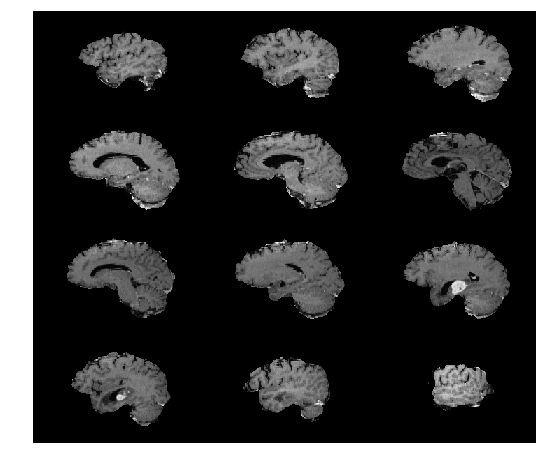

In [8]:
ants.plot(img_raw)

In [10]:
ants.n4_bias_field_correction(img_raw).to_file('/Users/Work/Desktop/BraTS19_TCIA02_473_1_t1ce_n4.nii.gz.nii.gz')

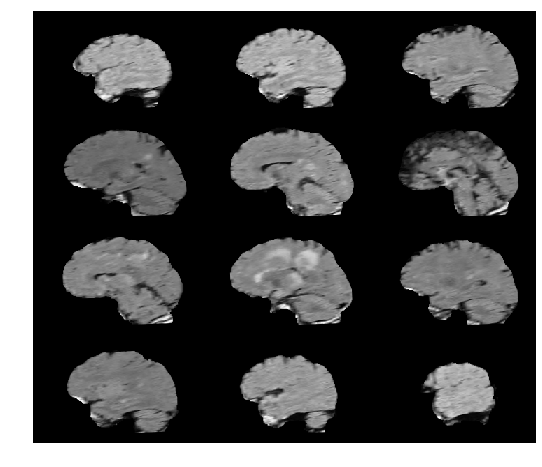

In [83]:
ants.image_read('/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_n4.nii.gz').plot()

# Preprocessing:  Skull Stripping

In [29]:
# Have to use this version to use deepbrain.
# !pip install tensorflow==1.15.0

    100% |████████████████████████████████| 124.0MB 332kB/s eta 0:00:010:00:02    43% |██████████████                  | 54.4MB 56.2MB/s eta 0:00:02
    100% |████████████████████████████████| 512kB 17.1MB/s ta 0:00:01
    100% |████████████████████████████████| 3.8MB 5.4MB/s eta 0:00:01
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Found existing installation: tensorboard 2.0.1
    Uninstalling tensorboard-2.0.1:
      Successfully uninstalled tensorboard-2.0.1
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [4]:

img = nib.load('data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz').get_fdata()


In [8]:
ext = Extractor()
prob = ext.run(img)

In [9]:
mask = prob > 0.5

In [2]:
from nipype import Node, Workflow
from nipype.interfaces.fsl import BET, IsotropicSmooth

In [7]:
skullstrip = Node(BET(mask = True, in_file='data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_t1.nii.gz'), name='skullstrip')

In [8]:
skullstrip

skullstrip

In [9]:
isosmooth = Node(IsotropicSmooth(), name = 'iso_smooth')
isosmooth.iterables = ('fwhm', [4,8,16])

In [11]:
wf = Workflow(name="smoothflow")
wf.base_dir = "/Users/Work/Desktop/capstone_test_images"

In [12]:
wf.connect(skullstrip, 'out_file', isosmooth, 'in_file')

In [10]:
# Run it in parallel (one core for each smoothing kernel)
wf.run('MultiProc', plugin_args={'n_procs': 3})

191120-13:26:48,790 nipype.workflow INFO:
	 Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']
191120-13:26:48,799 nipype.workflow INFO:
	 Running in parallel.
191120-13:26:48,803 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 14.40/14.40, Free processors: 3/3.
191120-13:26:49,40 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.skullstrip" in "/Users/Work/Desktop/capstone_test_images/smoothflow/skullstrip".
191120-13:26:49,56 nipype.workflow INFO:
	 [Node] Running "skullstrip" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_t1.nii.gz /Users/Work/Desktop/capstone_test_images/smoothflow/skullstrip/BraTS19_2013_2_1_t1_brain.nii.gz -m
191120-13:26:49,428 nipype.workflow WARNING:
	 Storing result file without outputs
191120-13:26:49,433 nipype.workflow WARNING:
	 [Node] Error on "smoothflow.skullstrip" (/User

RuntimeError: Workflow did not execute cleanly. Check log for details

191120-12:50:02,98 nipype.workflow INFO:
	 Generated workflow graph: /Users/Work/Desktop/capstone_test_images/smoothflow/graph.png (graph2use=exec, simple_form=True).


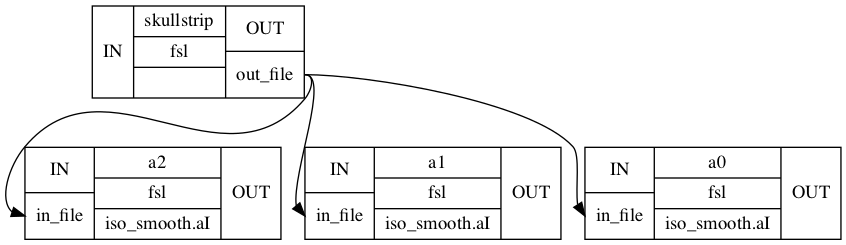

In [42]:
from IPython.display import Image
wf.write_graph(graph2use='exec', format='png', simple_form=True)
Image(filename='/Users/Work/Desktop/capstone_test_images/smoothflow/graph_detailed.png')

In [24]:
!tree /Users/Work/Desktop/capstone_test_images/smoothflow -I '*txt|*pklz|report*|*.json|*js|*.dot|*.html'


/bin/sh: tree: command not found


# Playground

In [31]:
img = nib.load('data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_seg.nii.gz')

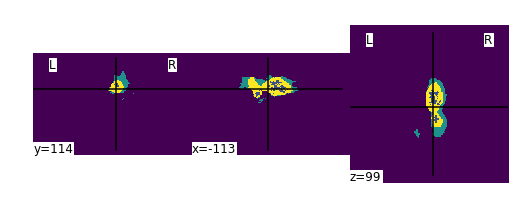

In [32]:
plotting.plot_img(img)

/Users/Work/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


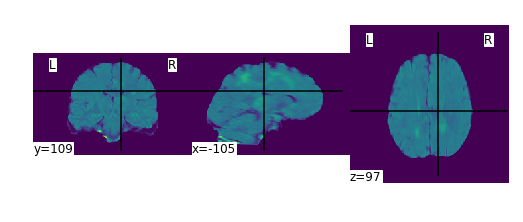

In [81]:
img2 = nib.load('/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_n4.nii.gz')
plotting.plot_img(img2)

In [45]:
pd.DataFrame(img.get_data().ravel()).T

,0,1,2,3,4,5,6,7,8,9,...,8927990,8927991,8927992,8927993,8927994,8927995,8927996,8927997,8927998,8927999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
%%bash
    
bet data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz /Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask.nii.gz -m


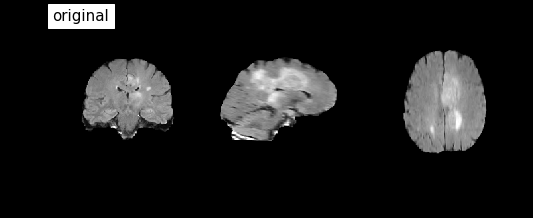

In [32]:
plotting.plot_anat('./data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

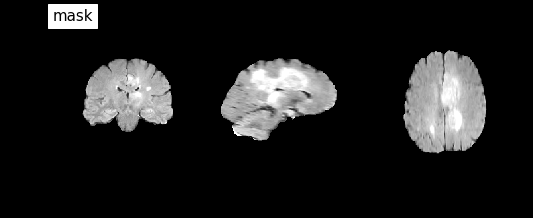

In [33]:
plotting.plot_anat('/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask.nii.gz', title='mask',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [ ]:
BET(mask = True,)

In [ ]:
BraTS19_TCIA02_473_1_t1ce_n4.nii

In [ ]:
, out_file = '/Users/Work/Desktop/BraTS19_TCIA02_473_1_t1ce_n4_bet.nii.gz'

In [18]:
pwd

'/Users/Work/Documents/brain_tumor_nn'

In [19]:
BET(in_file = './data/n4_processed/BraTS19_TCIA02_473_1_t1ce_n4.nii.gz').run()


191121-08:53:50,348 nipype.interface INFO:
	 stderr 2019-11-21T08:53:50.348373:/usr/local/fsl/bin/bet: line 393: 69928 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
191121-08:53:50,622 nipype.interface INFO:
	 stdout 2019-11-21T08:53:50.622079:Error. Expected to find bet2 output (/Users/Work/Documents/brain_tumor_nn/BraTS19_TCIA02_473_1_t1ce_n4_brain), but it did not exist. Perhaps this is a writing issue or memory issue


RuntimeError: Command:
bet /Users/Work/Documents/brain_tumor_nn/data/n4_processed/BraTS19_TCIA02_473_1_t1ce_n4.nii.gz /Users/Work/Documents/brain_tumor_nn/BraTS19_TCIA02_473_1_t1ce_n4_brain.nii.gz
Standard output:
Error. Expected to find bet2 output (/Users/Work/Documents/brain_tumor_nn/BraTS19_TCIA02_473_1_t1ce_n4_brain), but it did not exist. Perhaps this is a writing issue or memory issue
Standard error:
/usr/local/fsl/bin/bet: line 393: 69928 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
Return code: 1

In [73]:
IsotropicSmooth(in_file = '/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask.nii.gz',
               out_file = '/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask_smooth.nii.gz',
               fwhm=1).run()

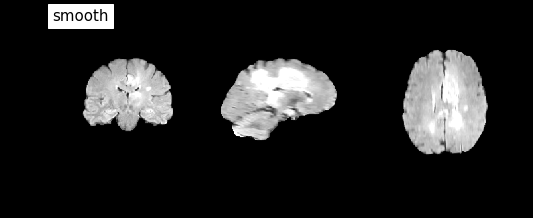

In [74]:
plotting.plot_anat('/Users/Work/Desktop/capstone_test_images/BraTS19_2013_2_1_flair_mask_smooth.nii.gz', title='smooth',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [59]:
IsotropicSmooth.help()

Wraps the executable command ``fslmaths``.

Use fslmaths to spatially smooth an image with a gaussian kernel.

Inputs::

        [Mandatory]
        fwhm: (a float)
                fwhm of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: sigma
        sigma: (a float)
                sigma of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: fwhm
        in_file: (a pathlike object or string representing an existing file)
                image to operate on
                argument: ``%s``, position: 2

        [Optional]
        out_file: (a pathlike object or string representing a file)
                image to write
                argument: ``%s``, position: -2
        internal_datatype: ('float' or 'char' or 'int' or 'short' or 'double'
                  or 'input')
                datatype to use for calculations (default is float)
                argument: ``-dt

In [51]:
isosmooth.iterables = ('fwhm',
                      [4,8,16])